In [1]:
#initializing workspace

import pandas as pd
import matplotlib.pyplot as plt
import trxtools as tt
import os
from pyCRAC.Parsers import GTF2
import pyBigWig
import numpy as np
from trxtools.BigWig import *

pathTAB = "../seq_references/Saccharomyces_cerevisiae.EF4.74.dna.toplevel.shortChrNames.tab"
pathGTF = "../seq_references/Saccharomyces_cerevisiae.EF4.74.shortChNames_with_PolIII_transcripts_extended_slop_intergenic_sort.gtf"
gtf = GTF2.Parse_GTF()
gtf.read_GTF(pathGTF)
gtf.read_TAB(pathTAB)

sequences = pd.read_csv(pathTAB, sep='\t',names=['chr','sequence'],index_col=0)
chr_len = sequences['sequence'].str.len()

pathDir = "../04_BigWig/"
pathMeta = "../06_metadata/"

dinucleotides = pd.read_csv(pathMeta+'/properties_of_dinucleotides.csv', index_col=0)
dinucleotides.index = dinucleotides.reset_index().index.astype(str)+"_"+dinucleotides.index

cleavage_sites = {"5' end" : (300),
                   'A0' : (300+609),
                   'A1' : (300+700),
                   'D'  : (300+2500),
                   'A2' : (300+2712),
                   'A3' : (300+2784),
                   'B1L': (300+2855),
                   'B1S': (300+2861),
                   'E'  : (300+3019),
                   'C1' : (300+3251),
                   'B2' : (300+6647),
                   'B0-1' : (300+6661),
                   'B0-2' : (300+6697),
                   'T1' : (300+6739)}

print(gtf.strand("RDN37-1"), gtf.chromosome("RDN37-1"), gtf.chromosomeCoordinates("RDN37-1"))
print(gtf.strand("RDN37-2"), gtf.chromosome("RDN37-2"), gtf.chromosomeCoordinates("RDN37-2"))

/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:220: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def binCollect3(s1=pd.Series(), lengths=[500,72,500], bins=[50, 10, 50]):
/home/tturowski/TurowskiLab/trxtools/trxtools/plotting.py:761: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plotAndFolding(df=pd.DataFrame(),dG=pd.Series(), title="", start=None, stop=None,legend=True,


- chrXII (451785, 457732)
- chrXII (460922, 466869)


# RDN37-1 and RDN37-1 are identical but flanks are different

In [2]:
flank = 1000
tocheck_RDN37_seq = "AAGGTATATTTTGTATGTTTTGTATGTTCCCGCGCGTTTCCGTATTTTCCGCTTCCGCTTCCGCAGTAAAAAATAGTGAGGAACTGGGTTACCCGGGGCACCTGTCACTTTGGAAAAAAAATATACGCTAAGATTTTTGGAGAATAGCTTAAATTGAAGTTTTTCTCGGCGAGAAATACGTAGTTAAGGCAGAGCGACAGAGAGGGCAAAAGAAAATAAAAGTAAGATTTTAGTTTGTAATGGGAGGGGGGGTTTAGTCATGGAGTACAAGTGTGAGGAAAAGTAGTTGGGAGGTACTTCATGCGAAAGCAGTTGAAGACAAGTTCGAAAAGAGTTTGGAAACGAATTCGAGTAGGCTTGTCGTTCGTTATGTTTTTGTAAATGGCCTCGTCAAACGGTGGAGAGAGTCGCTAGGTGATCGTCAGATCTGCCTAGTCTCTATACAGCGTGTTTAATTGACATGGGTTGATGCGTATTGAGAGATACAATTTGGGAAGAAATTCCCAGAGTGTGTTTCTTTTGCGTTTAACCTGAACAGTCTCATCGTGGGCATCTTGCGATTCCATTGGTGAGCAGCGAAGGATTTGGTGGATTACTAGCTAATAGCAATCTATTTCAAAGAATTCAAACTTGGGGGAATGCCTTGTTGAATAGCCGGTCGCAAGACTGTGATTCTTCAAGTGTAACCTCCTCTCAAATCAGCGATATCAAACGTACCATTCCGTGAAACACCGGGGTATCTGTTTGGTGGAACCTGATTAGAGGAAACTCAAAGAGTGCTATGGTATGGTGACGGAGTGCGCTGGTCAAGAGTGTAAAAGCTTTTTGAACAGAGAGCATTTCCGGCAGCAGAGAGACCTGAAAAAGCAATTTTTCTGGAATTTCAGCTGTTTCCAAACTCAATAAGTATCTTCTAGCAAGAGGGAATAGGTGGGAAAAAAAAAAAGAGATTTCGGTTTCTTTCTTTTTTACTGCTTGTTGCTTCTTCTTTTAAGATAGTTATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTAAGCCATGCATGTCTAAGTATAAGCAATTTATACAGTGAAACTGCGAATGGCTCATTAAATCAGTTATCGTTTATTTGATAGTTCCTTTACTACATGGTATAACTGTGGTAATTCTAGAGCTAATACATGCTTAAAATCTCGACCCTTTGGAAGAGATGTATTTATTAGATAAAAAATCAATGTCTTCGGACTCTTTGATGATTCATAATAACTTTTCGAATCGCATGGCCTTGTGCTGGCGATGGTTCATTCAAATTTCTGCCCTATCAACTTTCGATGGTAGGATAGTGGCCTACCATGGTTTCAACGGGTAACGGGGAATAAGGGTTCGATTCCGGAGAGGGAGCCTGAGAAACGGCTACCACATCCAAGGAAGGCAGCAGGCGCGCAAATTACCCAATCCTAATTCAGGGAGGTAGTGACAATAAATAACGATACAGGGCCCATTCGGGTCTTGTAATTGGAATGAGTACAATGTAAATACCTTAACGAGGAACAATTGGAGGGCAAGTCTGGTGCCAGCAGCCGCGGTAATTCCAGCTCCAATAGCGTATATTAAAGTTGTTGCAGTTAAAAAGCTCGTAGTTGAACTTTGGGCCCGGTTGGCCGGTCCGATTTTTTCGTGTACTGGATTTCCAACGGGGCCTTTCCTTCTGGCTAACCTTGAGTCCTTGTGGCTCTTGGCGAACCAGGACTTTTACTTTGAAAAAATTAGAGTGTTCAAAGCAGGCGTATTGCTCGAATATATTAGCATGGAATAATAGAATAGGACGTTTGGTTCTATTTTGTTGGTTTCTAGGACCATCGTAATGATTAATAGGGACGGTCGGGGGCATCAGTATTCAATTGTCAGAGGTGAAATTCTTGGATTTATTGAAGACTAACTACTGCGAAAGCATTTGCCAAGGACGTTTTCATTAATCAAGAACGAAAGTTAGGGGATCGAAGATGATCAGATACCGTCGTAGTCTTAACCATAAACTATGCCGACTAGGGATCGGGTGGTGTTTTTTTAATGACCCACTCGGCACCTTACGAGAAATCAAAGTCTTTGGGTTCTGGGGGGAGTATGGTCGCAAGGCTGAAACTTAAAGGAATTGACGGAAGGGCACCACCAGGAGTGGAGCCTGCGGCTTAATTTGACTCAACACGGGGAAACTCACCAGGTCCAGACACAATAAGGATTGACAGATTGAGAGCTCTTTCTTGATTTTGTGGGTGGTGGTGCATGGCCGTTCTTAGTTGGTGGAGTGATTTGTCTGCTTAATTGCGATAACGAACGAGACCTTAACCTACTAAATAGTGGTGCTAGCATTTGCTGGTTATCCACTTCTTAGAGGGACTATCGGTTTCAAGCCGATGGAAGTTTGAGGCAATAACAGGTCTGTGATGCCCTTAGACGTTCTGGGCCGCACGCGCGCTACACTGACGGAGCCAGCGAGTCTAACCTTGGCCGAGAGGTCTTGGTAATCTTGTGAAACTCCGTCGTGCTGGGGATAGAGCATTGTAATTATTGCTCTTCAACGAGGAATTCCTAGTAAGCGCAAGTCATCAGCTTGCGTTGATTACGTCCCTGCCCTTTGTACACACCGCCCGTCGCTAGTACCGATTGAATGGCTTAGTGAGGCCTCAGGATCTGCTTAGAGAAGGGGGCAACTCCATCTCAGAGCGGAGAATTTGGACAAACTTGGTCATTTAGAGGAACTAAAAGTCGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTAAAGAAATTTAATAATTTTGAAAATGGATTTTTTTGTTTTGGCAAGAGCATGAGAGCTTTTACTGGGCAAGAAGACAAGAGATGGAGAGTCCAGCCGGGCCTGCGCTTAAGTGCGCGGTCTTGCTAGGCTTGTAAGTTTCTTTCTTGCTATTCCAAACGGTGAGAGATTTCTGTGCTTTTGTTATAGGACAATTAAAACCGTTTCAATACAACACACTGTGGAGTTTTCATATCTTTGCAACTTTTTCTTTGGGCATTCGAGCAATCGGGGCCCAGAGGTAACAAACACAAACAATTTTATCTATTCATTAAATTTTTGTCAAAAACAAGAATTTTCGTAACTGGAAATTTTAAAATATTAAAAACTTTCAACAACGGATCTCTTGGTTCTCGCATCGATGAAGAACGCAGCGAAATGCGATACGTAATGTGAATTGCAGAATTCCGTGAATCATCGAATCTTTGAACGCACATTGCGCCCCTTGGTATTCCAGGGGGCATGCCTGTTTGAGCGTCATTTCCTTCTCAAACATTCTGTTTGGTAGTGAGTGATACTCTTTGGAGTTAACTTGAAATTGCTGGCCTTTTCATTGGATGTTTTTTTTCCAAAGAGAGGTTTCTCTGCGTGCTTGAGGTATAATGCAAGTACGGTCGTTTTAGGTTTTACCAACTGCGGCTAATCTTTTTTTATACTGAGCGTATTGGAACGTTATCGATAAGAAGAGAGCGTCTAGGCGAACAATGTTCTTAAAGTTTGACCTCAAATCAGGTAGGAGTACCCGCTGAACTTAAGCATATCAATAAGCGGAGGAAAAGAAACCAACCGGGATTGCCTTAGTAACGGCGAGTGAAGCGGCAAAAGCTCAAATTTGAAATCTGGTACCTTCGGTGCCCGAGTTGTAATTTGGAGAGGGCAACTTTGGGGCCGTTCCTTGTCTATGTTCCTTGGAACAGGACGTCATAGAGGGTGAGAATCCCGTGTGGCGAGGAGTGCGGTTCTTTGTAAAGTGCCTTCGAAGAGTCGAGTTGTTTGGGAATGCAGCTCTAAGTGGGTGGTAAATTCCATCTAAAGCTAAATATTGGCGAGAGACCGATAGCGAACAAGTACAGTGATGGAAAGATGAAAAGAACTTTGAAAAGAGAGTGAAAAAGTACGTGAAATTGTTGAAAGGGAAGGGCATTTGATCAGACATGGTGTTTTGTGCCCTCTGCTCCTTGTGGGTAGGGGAATCTCGCATTTCACTGGGCCAGCATCAGTTTTGGTGGCAGGATAAATCCATAGGAATGTAGCTTGCCTCGGTAAGTATTATAGCCTGTGGGAATACTGCCAGCTGGGACTGAGGACTGCGACGTAAGTCAAGGATGCTGGCATAATGGTTATATGCCGCCCGTCTTGAAACACGGACCAAGGAGTCTAACGTCTATGCGAGTGTTTGGGTGTAAAACCCATACGCGTAATGAAAGTGAACGTAGGTTGGGGCCTCGCAAGAGGTGCACAATCGACCGATCCTGATGTCTTCGGATGGATTTGAGTAAGAGCATAGCTGTTGGGACCCGAAAGATGGTGAACTATGCCTGAATAGGGTGAAGCCAGAGGAAACTCTGGTGGAGGCTCGTAGCGGTTCTGACGTGCAAATCGATCGTCGAATTTGGGTATAGGGGCGAAAGACTAATCGAACCATCTAGTAGCTGGTTCCTGCCGAAGTTTCCCTCAGGATAGCAGAAGCTCGTATCAGTTTTATGAGGTAAAGCGAATGATTAGAGGTTCCGGGGTCGAAATGACCTTGACCTATTCTCAAACTTTAAATATGTAAGAAGTCCTTGTTACTTAATTGAACGTGGACATTTGAATGAAGAGCTTTTAGTGGGCCATTTTTGGTAAGCAGAACTGGCGATGCGGGATGAACCGAACGTAGAGTTAAGGTGCCGGAATACACGCTCATCAGACACCACAAAAGGTGTTAGTTCATCTAGACAGCCGGACGGTGGCCATGGAAGTCGGAATCCGCTAAGGAGTGTGTAACAACTCACCGGCCGAATGAACTAGCCCTGAAAATGGATGGCGCTCAAGCGTGTTACCTATACTCTACCGTCAGGGTTGATATGATGCCCTGACGAGTAGGCAGGCGTGGAGGTCAGTGACGAAGCCTAGACCGTAAGGTCGGGTCGAACGGCCTCTAGTGCAGATCTTGGTGGTAGTAGCAAATATTCAAATGAGAACTTTGAAGACTGAAGTGGGGAAAGGTTCCACGTCAACAGCAGTTGGACGTGGGTTAGTCGATCCTAAGAGATGGGGAAGCTCCGTTTCAAAGGCCTGATTTTATGCAGGCCACCATCGAAAGGGAATCCGGTTAAGATTCCGGAACCTGGATATGGATTCTTCACGGTAACGTAACTGAATGTGGAGACGTCGGCGCGAGCCCTGGGAGGAGTTATCTTTTCTTCTTAACAGCTTATCACCCCGGAATTGGTTTATCCGGAGATGGGGTCTTATGGCTGGAAGAGGCCAGCACCTTTGCTGGCTCCGGTGCGCTTGTGACGGCCCGTGAAAATCCACAGGAAGGAATAGTTTTCATGCCAGGTCGTACTGATAACCGCAGCAGGTCTCCAAGGTGAACAGCCTCTAGTTGATAGAATAATGTAGATAAGGGAAGTCGGCAAAATAGATCCGTAACTTCGGGATAAGGATTGGCTCTAAGGGTCGGGTAGTGAGGGCCTTGGTCAGACGCAGCGGGCGTGCTTGTGGACTGCTTGGTGGGGCTTGCTCTGCTAGGCGGACTACTTGCGTGCCTTGTTGTAGACGGCCTTGGTAGGTCTCTTGTAGACCGTCGCTTGCTACAATTAACGATCAACTTAGAACTGGTACGGACAAGGGGAATCTGACTGTCTAATTAAAACATAGCATTGCGATGGTCAGAAAGTGATGTTGACGCAATGTGATTTCTGCCCAGTGCTCTGAATGTCAAAGTGAAGAAATTCAACCAAGCGCGGGTAAACGGCGGGAGTAACTATGACTCTCTTAAGGTAGCCAAATGCCTCGTCATCTAATTAGTGACGCGCATGAATGGATTAACGAGATTCCCACTGTCCCTATCTACTATCTAGCGAAACCACAGCCAAGGGAACGGGCTTGGCAGAATCAGCGGGGAAAGAAGACCCTGTTGAGCTTGACTCTAGTTTGACATTGTGAAGAGACATAGAGGGTGTAGAATAAGTGGGAGCTTCGGCGCCAGTGAAATACCACTACCTTTATAGTTTCTTTACTTATTCAATGAAGCGGAGCTGGAATTCATTTTCCACGTTCTAGCATTCAAGGTCCCATTCGGGGCTGATCCGGGTTGAAGACATTGTCAGGTGGGGAGTTTGGCTGGGGCGGCACATCTGTTAAACGATAACGCAGATGTCCTAAGGGGGGCTCATGGAGAACAGAAATCTCCAGTAGAACAAAAGGGTAAAAGCCCCCTTGATTTTGATTTTCAGTGTGAATACAAACCATGAAAGTGTGGCCTATCGATCCTTTAGTCCCTCGGAATTTGAGGCTAGAGGTGCCAGAAAAGTTACCACAGGGATAACTGGCTTGTGGCAGTCAAGCGTTCATAGCGACATTGCTTTTTGATTCTTCGATGTCGGCTCTTCCTATCATACCGAAGCAGAATTCGGTAAGCGTTGGATTGTTCACCCACTAATAGGGAACGTGAGCTGGGTTTAGACCGTCGTGAGACAGGTTAGTTTTACCCTACTGATGAATGTTACCGCAATAGTAATTGAACTTAGTACGAGAGGAACAGTTCATTCGGATAATTGGTTTTTGCGGCTGTCTGATCAGGCATTGCCGCGAAGCTACCATCCGCTGGATTATGGCTGAACGCCTCTAAGTCAGAATCCATGCTAGAACGCGGTGATTTCTTTGCTCCACACAATATAGATGGATACGAATAAGGCGTCCTTGTGGCGTCGCTGAACCATAGCAGGCTAGCAACGGTGCACTTGGCGGAAAGGCCTTGGGTGCTTGCTGGCGAATTGCAATGTCATTTTGCGTGGGGATAAATCATTTGTATACGACTTAGATGTACAACGGGGTATTGTAAGCAGTAGAGTAGCCTTGTTGTTACGATCTGCTGAGATTAAGCCTTTGTTGTCTGATTTGTTTTTTATTTCTTTCTAAGTGGGTACTGGCAGGAGCCGGGGCCTAGTTTAGAGAGAAGTAGACTGAACAAGTCTCTATAAATTTTATTTGTCTTAAGAATTCTATGATCCGGGTAAAAACATGTATTGTATATATCTATTATAATATACGATGAGGATGATAGTGTGTAAGAGTGTACCATTTACTAATGTATGTAAGTTACTATTTACTATTTGGTCTTTTTATTTTTTATTTTTTTTTTTTTTTTCGTTGCAAAGATGGGTTGAAAGAGAAGGGCTTTCACAAAGCTTCCCGAGCGTGAAAGGATTTGCCCGGACAGTTTGCTTCATGGAGCAGTTTTTTCCGCACCATCAGAGCGGCAAACATGAGGAAATATCCATTACCCACAGTAAGACTTTTTTGAATACTCTTTAATATTTTTTATTTAAATAAATATTTATAAAAAAAAATATGAAACAATGATAATAAATATTAAGATTATTAAATTATATATATTATAATAATAATAAATAATAATAATAAGAATTATAAATATTTTTACGAACGTTTCGTTCAAGCGGTGTGCCGCAAGATTGTTCCCAGTATACTAATTTTTCCAATTATATTACATGGGTCGTTTTAATATGGTAAAAAATTTGGCAACGAGATAGTTGTGCCCAACATGAGAATTCTTTTTACTATAAATCCAATTACTTATATGTGTATTACGTGATATACAGTGACAGCCTCACAAATTTTTTTTCTGAAAAGTCAGAAAGAAATATGTAAACCTTTTCCTGAGCACTAAATGAGGACAATGCAGGAGTTCTATCCAATGGAATTGCAACAGCAATGGAACAAGTAGTGTATGCATATTGCTGTGTGTTCCATAGTAACAAATCAAGTGTTTTGGCATCGCATATCAATGTTTACACTCTATGCGTTTCTATATGGTTGATTTTATGATAGAGAGGGGAAGTGTTCAACAAAAGGCTCAACGGTGATGCAGCTAAGTTAAATAT"

seq1 = tt.methods.reverse_complement(sequences.loc['chrXII'][0][451785:457732])
seq2 = tt.methods.reverse_complement(sequences.loc['chrXII'][0][460922:466869])
if seq1 == seq2: print('coding seq identical with each other')
else: print('error')

RDN37_seq = seq1
if RDN37_seq == tocheck_RDN37_seq[flank:-flank]: print('coding seq identical with tocheck')
else: print('error')
    
seq1_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][451785-flank:457732+flank])
seq2_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][460922-flank:466869+flank])
if seq1_flank == seq2_flank: print('sequences with flanks are identical')
else: print('error - sequences with flanks are not identical')

if seq1_flank == tocheck_RDN37_seq: print('seq 1 identical with flanks')
elif seq2_flank == tocheck_RDN37_seq: print('seq 2 identical with flanks')
else: print('error')

coding seq identical with each other
coding seq identical with tocheck
error - sequences with flanks are not identical
seq 1 identical with flanks


# loading data

In [3]:
#loading datasets

data_files_raw = [f for f in os.listdir(pathDir) if 'raw' in f and "bw" in f]
data_files_5end = [f for f in os.listdir(pathDir) if 'PROFILE_5end' in f and "bw" in f]
data_files_3end = [f for f in os.listdir(pathDir) if 'PROFILE_3end' in f and "polyA" not in f and "bw" in f]

print(len(os.listdir(pathDir)))
print(len(data_files_raw))
print(len(data_files_5end))
print(len(data_files_3end))

df01a_RDN371_datasets_3end = geneFromBigWig(gene_name="RDN37-1", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
s1_RDN371_sequence = df01a_RDN371_datasets_3end['nucleotide'] #kee[ for future use
df01b_RDN372_datasets_3end = geneFromBigWig(gene_name="RDN37-2", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
df01_RDN37_3end = df01a_RDN371_datasets_3end.drop('nucleotide',axis='columns') + df01b_RDN372_datasets_3end.drop('nucleotide',axis='columns')

df02a_RDN371_datasets_5end = geneFromBigWig(gene_name="RDN37-1", data_path=pathDir, data_files=data_files_5end, gtf=gtf,ranges=flank)
df02b_RDN372_datasets_5end = geneFromBigWig(gene_name="RDN37-2", data_path=pathDir, data_files=data_files_5end, gtf=gtf,ranges=flank)
df02_RDN37_5end = df02a_RDN371_datasets_5end.drop('nucleotide',axis='columns') + df02b_RDN372_datasets_5end.drop('nucleotide',axis='columns')

df04a_RDN371_datasets_raw = geneFromBigWig(gene_name="RDN37-1", data_path=pathDir, data_files=data_files_raw, gtf=gtf,ranges=flank)
df04b_RDN372_datasets_raw = geneFromBigWig(gene_name="RDN37-2", data_path=pathDir, data_files=data_files_raw, gtf=gtf,ranges=flank)
df04_RDN37_raw = df04a_RDN371_datasets_raw.drop('nucleotide',axis='columns') + df04b_RDN372_datasets_raw.drop('nucleotide',axis='columns')

df05_folding = foldingFromBigWig("RDN37-1",data_path=pathMeta,data_files=["w65_dG"], gtf=gtf,ranges=flank,range5end=700)

1287
262
250
250


/home/tturowski/TurowskiLab/trxtools/trxtools/BigWig.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t1[name] = getSeqData(gene_name, data_path, name, gtf, ranges=ranges)
/home/tturowski/TurowskiLab/trxtools/trxtools/BigWig.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_t1[name] = getSeqData(gene_name, data_path, name, gtf, ranges=ranges)
/home/tturowski/TurowskiLab/trxtools/trxtools/BigWig.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

# Fig 1 RDN37 profile

Experiments: 
['XX000000_Rpa190HTP_wt_none_1_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_3_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_5_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_4_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_6_PROFILE_3end', 'XX000000_Rpa190HTP_wt_none_2_PROFILE_3end']


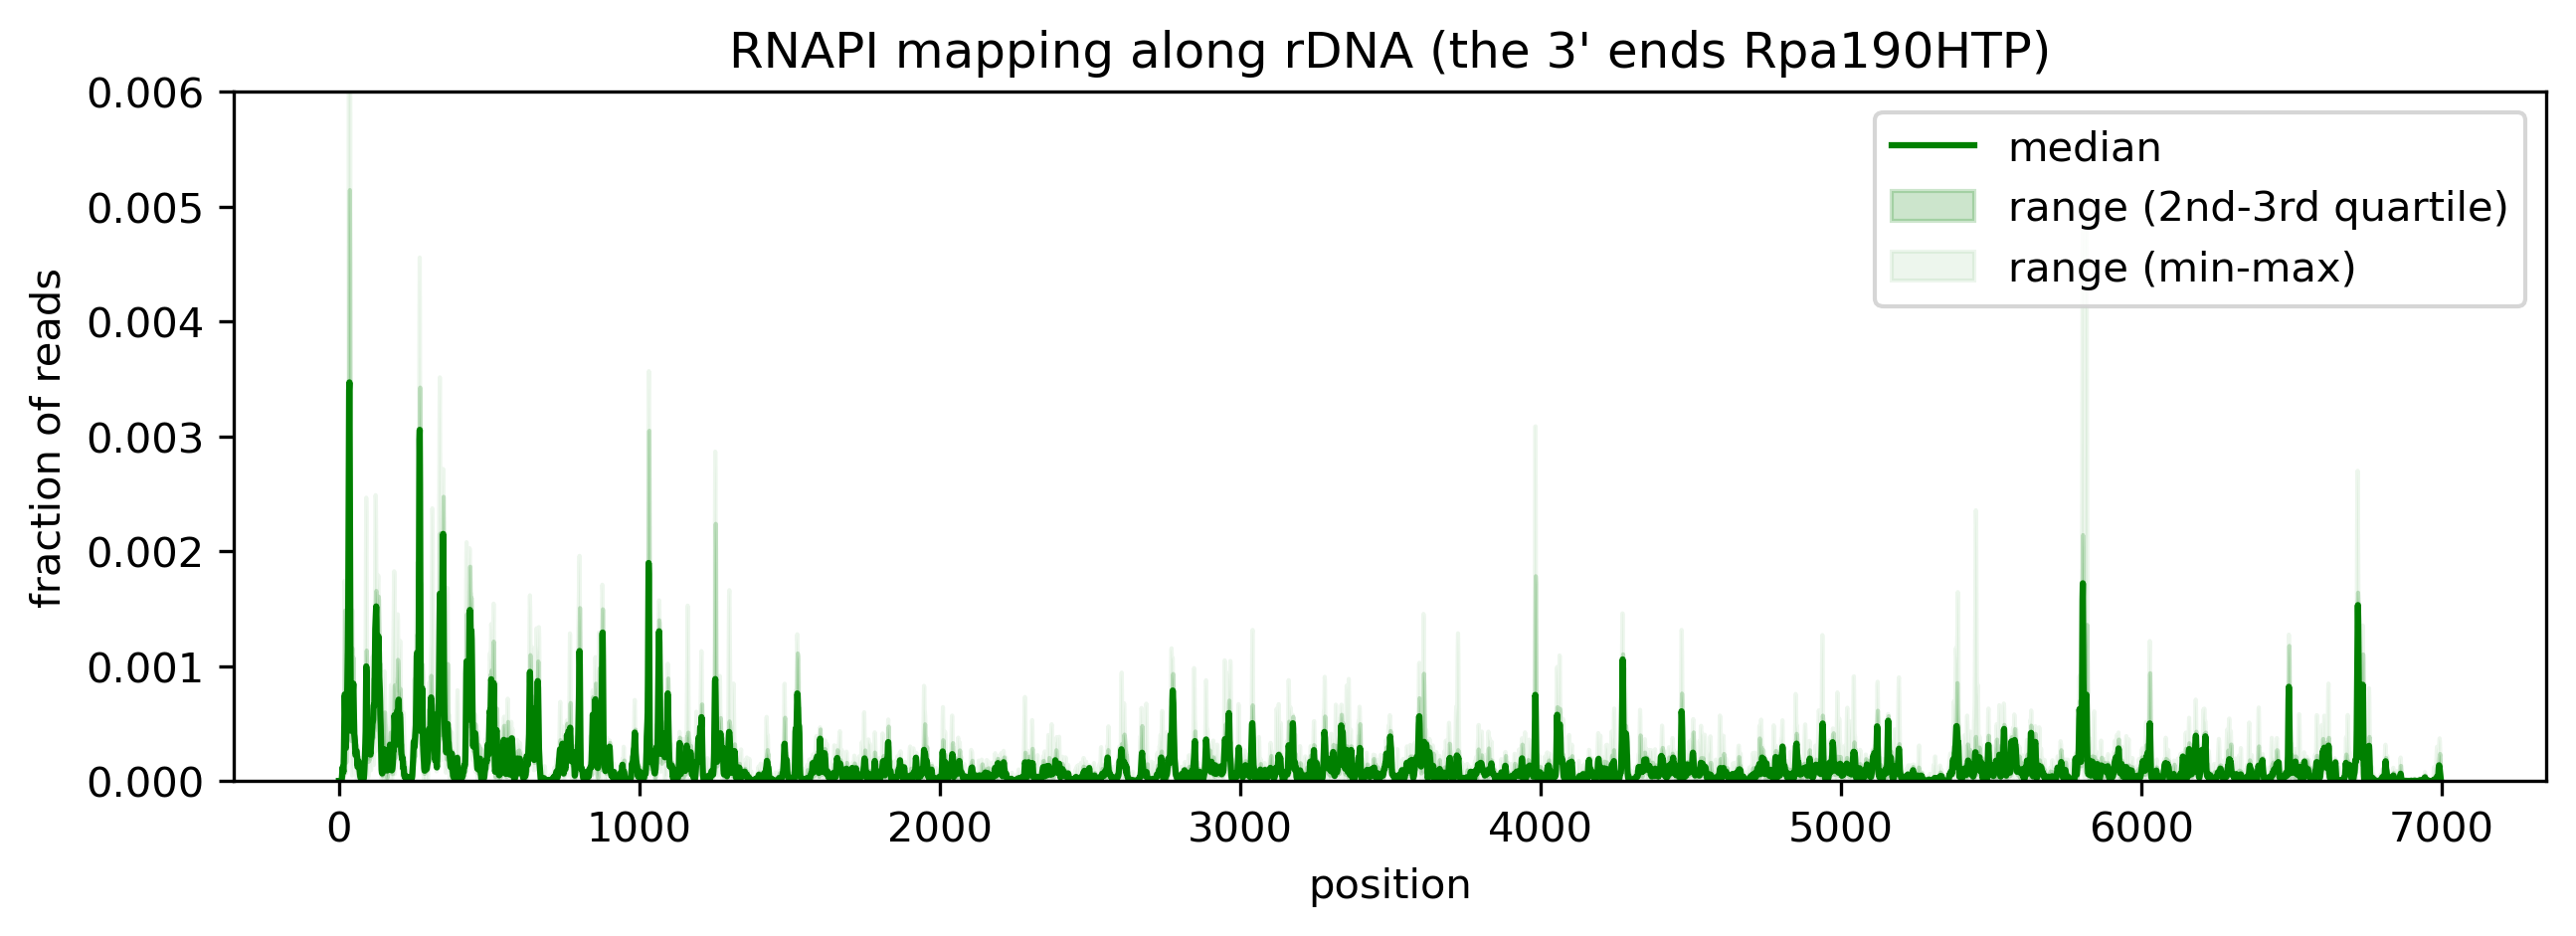

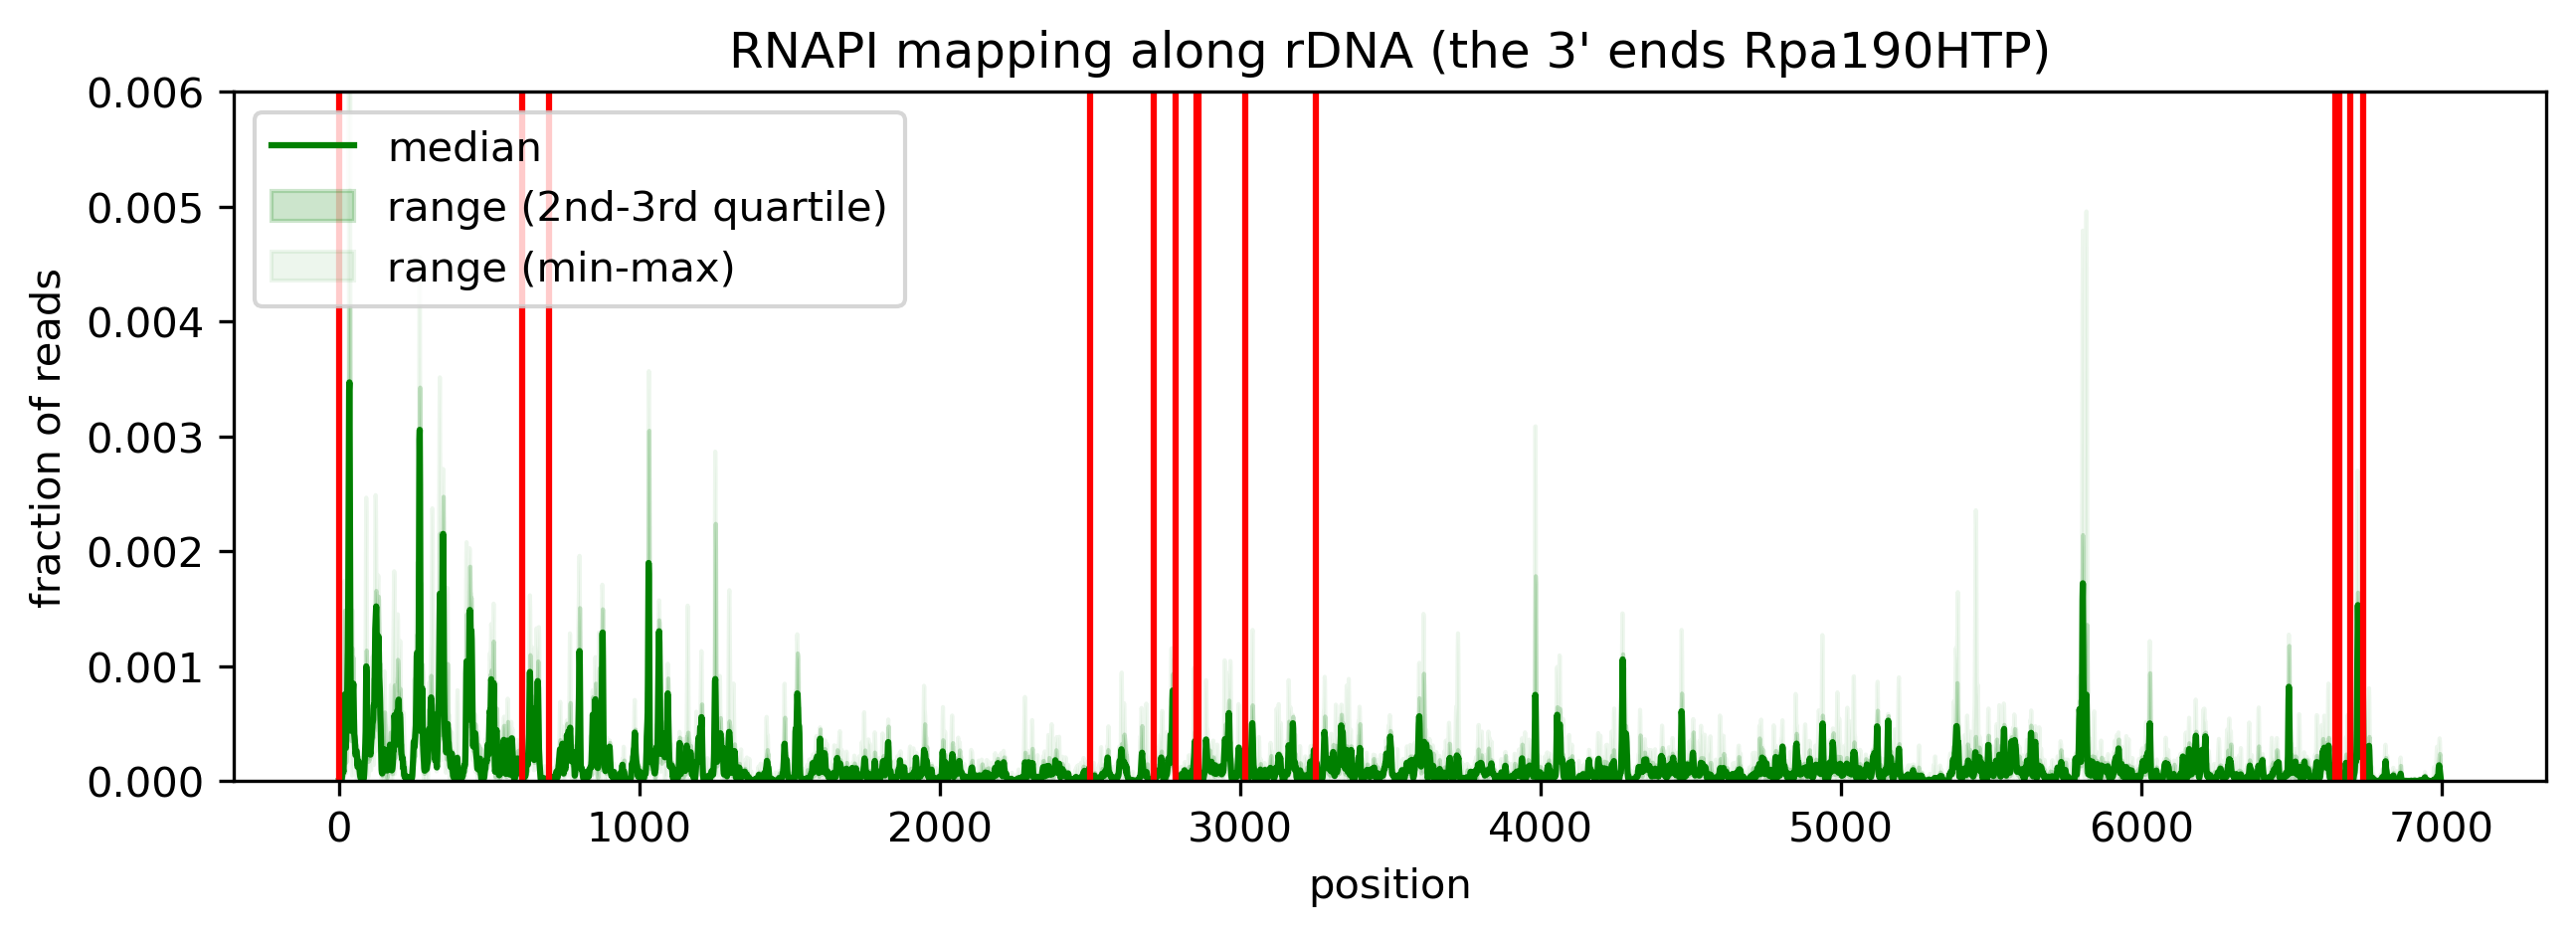

In [4]:
df11_Rpa190_3end = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa190HTP','wt','none'], 
                                     let_out=['hmo1','0s','25rDNA','UVA',
                                              'Rnt1','rrp44','trf4','air1','rat1',
                                              'h_','C_'],
                                     stats=True)

tt.plotting.plot_as_box_plot(df11_Rpa190_3end, figsize=(10,3), title="RNAPI mapping along rDNA (the 3' ends Rpa190HTP)",
                             start=300,stop=7300,
                             dpi=300,ylim=(None,0.006),offset=300,fname='Fig_1C.png')
tt.plotting.plot_as_box_plot(df11_Rpa190_3end, figsize=(10,3), title="RNAPI mapping along rDNA (the 3' ends Rpa190HTP)",
                             h_lines=[i-300 for i in cleavage_sites.values()],
                             start=300,stop=7300,
                             dpi=300,ylim=(None,0.006),offset=300,fname='Fig_S1A.png')

# Fig 2: RNAPI slows down along the 3' ETS

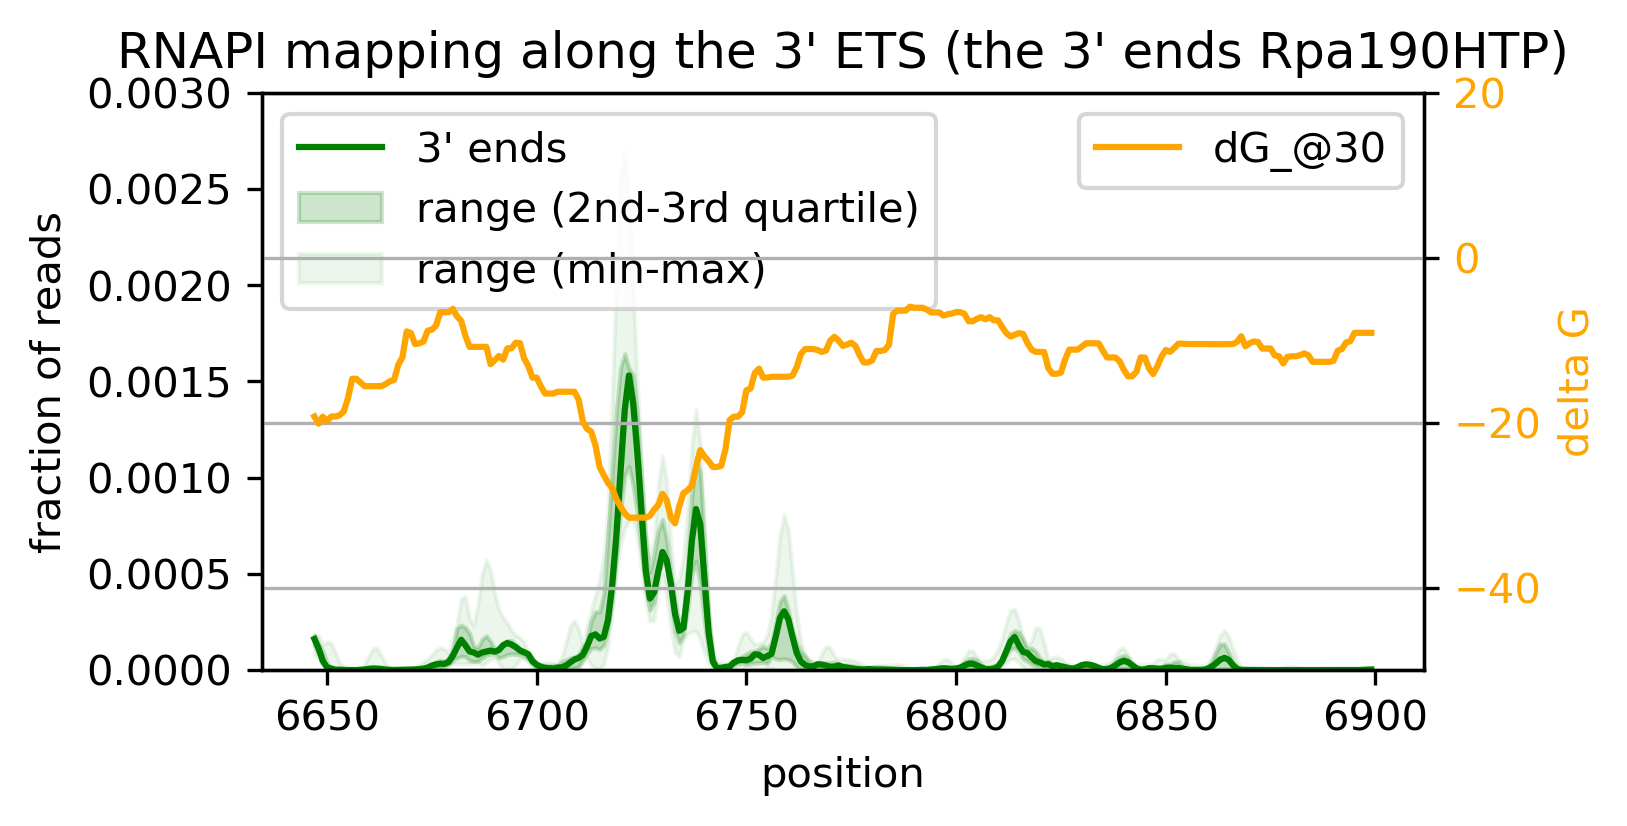

In [5]:
# tt.plotting.plot_as_box_plot(df11_Rpa190_3end, figsize=(5,2.5), title="RNAPI mapping along the 3' ETS (the 3' ends Rpa190HTP)",
#                              dpi=300,ylim=(None,0.003), start=6647+300, stop=6900+300,
#                              h_lines=[i-300 for i in cleavage_sites.values()],offset=300,fname='Fig_2x.png')

tt.plotting.plotAndFolding(df11_Rpa190_3end, dG=df05_folding['w65_dG_add15nt'],figsize=(5,2.5),name="3' ends",
                           title="RNAPI mapping along the 3' ETS (the 3' ends Rpa190HTP)",
                           dpi=300,offset=300, ylim=(None,0.003),
                           start=6647+300, stop=6900+300, fname='Fig_2A.png')

Experiments: 
['XX000000_Rpa190HTP_wt_none_4_PROFILE_5end', 'XX000000_Rpa190HTP_wt_none_6_PROFILE_5end', 'XX000000_Rpa190HTP_wt_none_1_PROFILE_5end', 'XX000000_Rpa190HTP_wt_none_2_PROFILE_5end', 'XX000000_Rpa190HTP_wt_none_3_PROFILE_5end', 'XX000000_Rpa190HTP_wt_none_5_PROFILE_5end']


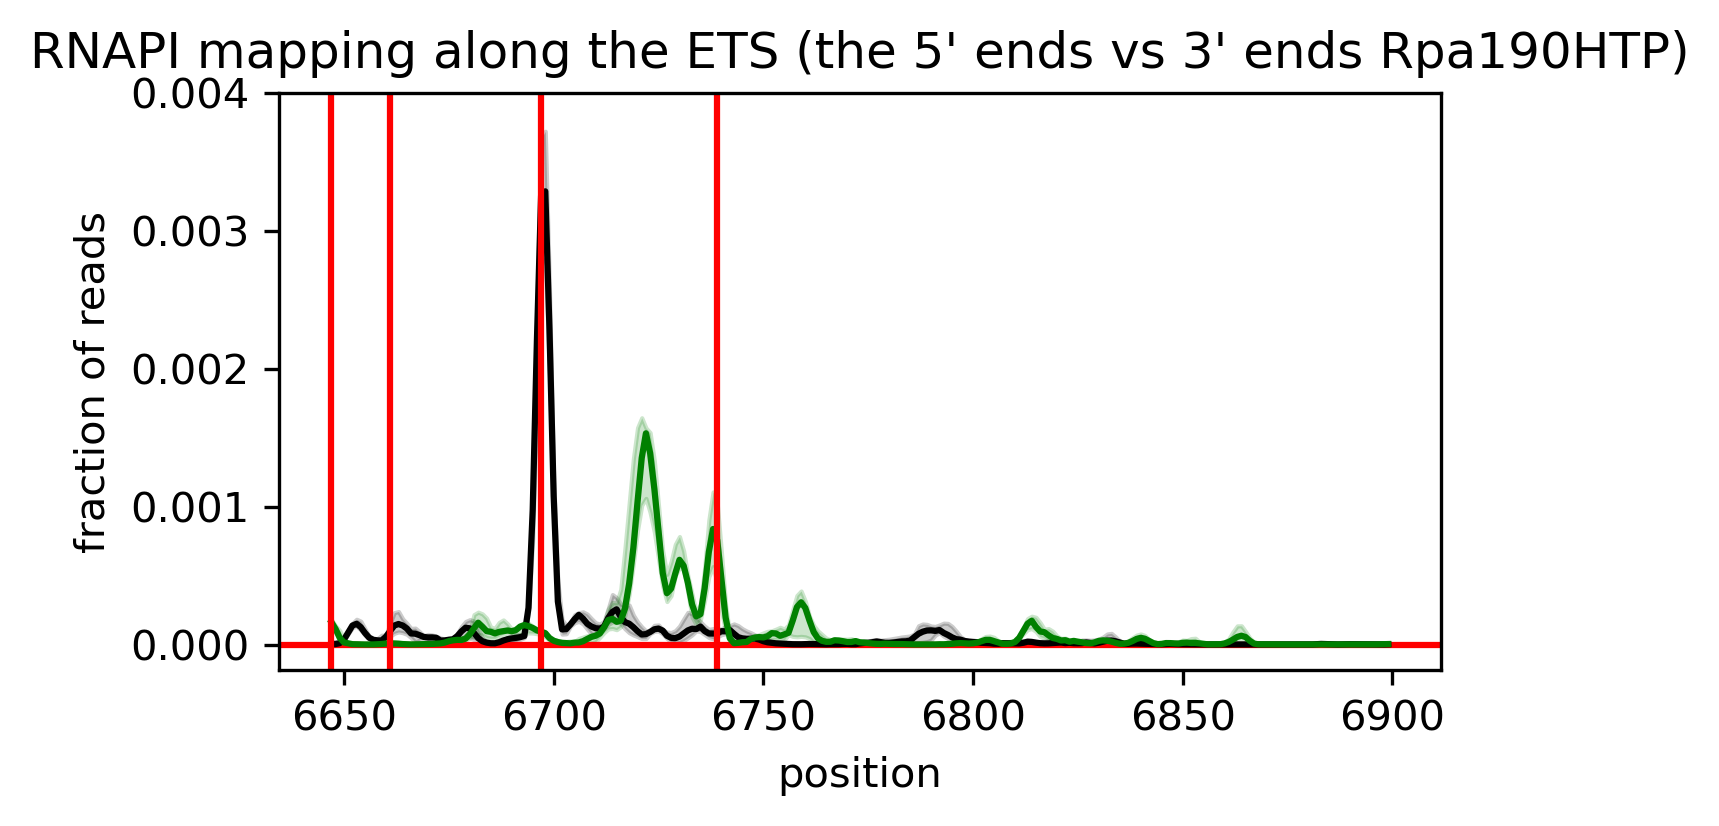

In [6]:
df12_Rpa190_5end = tt.profiles.preprocess(df02_RDN37_5end,
                                     let_in=['Rpa190HTP','wt','none'], 
                                     let_out=['hmo1','0s','25rDNA','UVA',
                                              'Rnt1','rrp44','trf4','air1','rat1',
                                              'h_','C_'],
                                     stats=True)

tt.plotting.plot_to_compare(ref=df11_Rpa190_3end, df=df12_Rpa190_5end,figsize=(5,2.5),ref_label="3' ends",label="5' ends",
                           title="RNAPI mapping along the ETS (the 5' ends vs 3' ends Rpa190HTP)",
                           dpi=300,offset=300, ylim=(None,0.004),
                           start=6647+300, stop=6900+300,legend=False,
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           fname='Fig_2B.png')

# tt.plotting.plot_to_compare(ref=df11_Rpa190_3end, df=df12_Rpa190_5end,figsize=(5,2.5),ref_label="3' ends",label="5' ends",
#                            title="RNAPI mapping along the ETS (the 5' ends vs 3' ends Rpa190HTP)",
#                            dpi=300,offset=300, ylim=(None,0.004),
#                            start=6647+300, stop=6900+300,
#                            fname='Fig_2Bv2.png')

Experiments: 
['SG120826_Rat1HTP_wt_none_11_default_PROFILE_5end', 'SG120826_Rat1HTP_wt_none_5_default_PROFILE_5end']


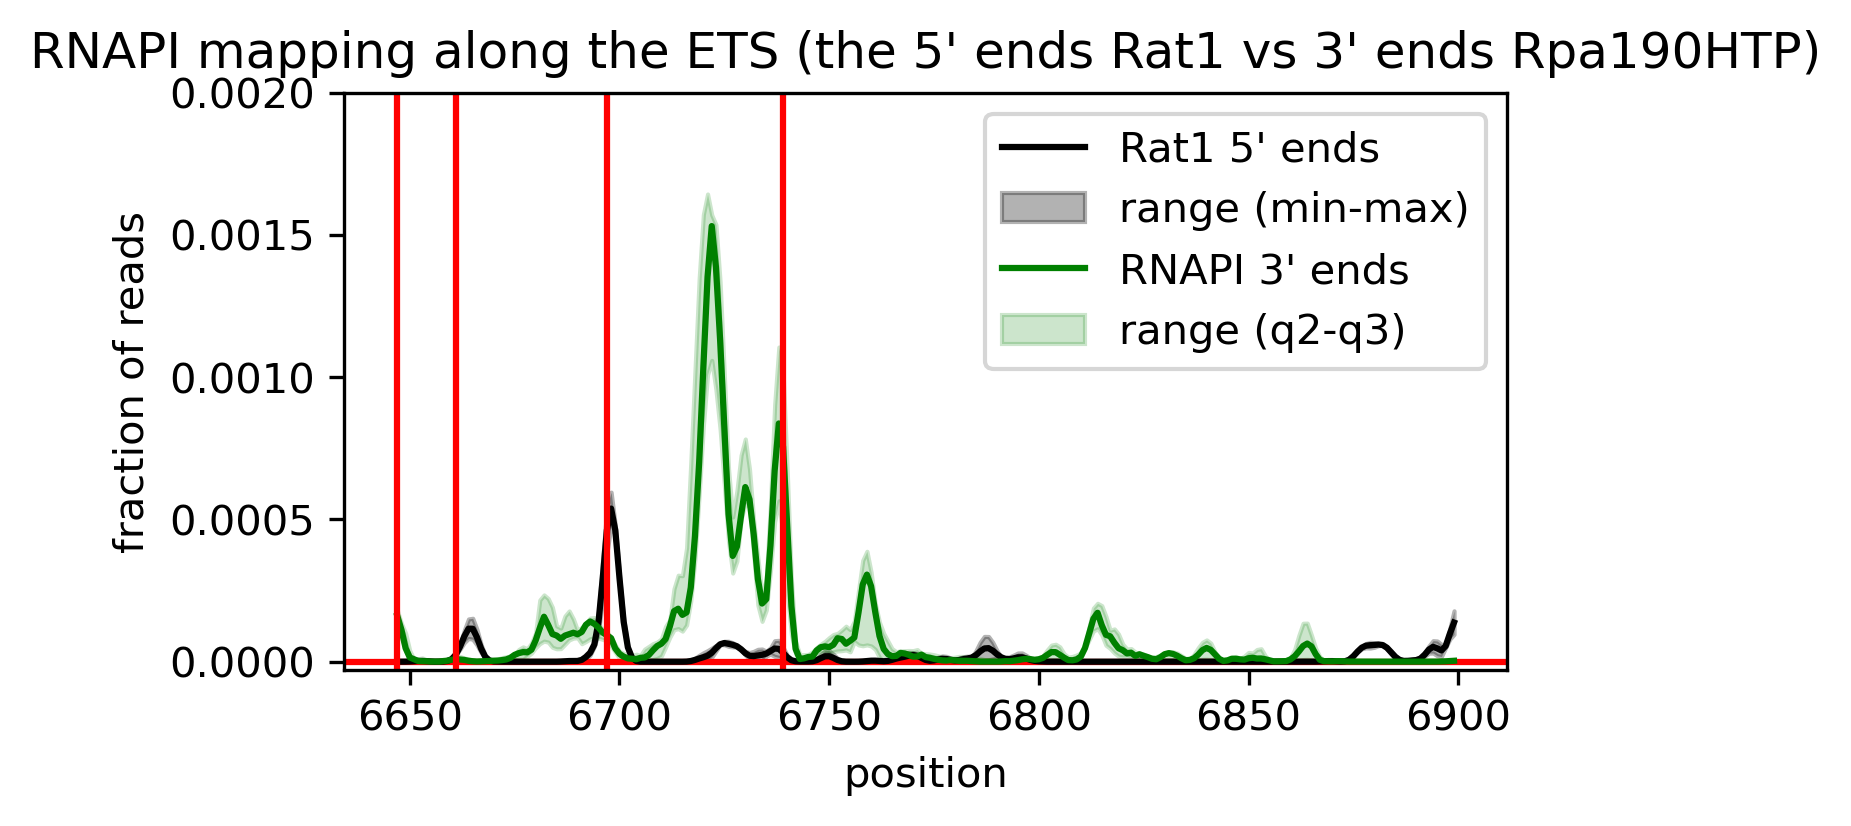

In [7]:
df13_Rat1_5end = tt.profiles.preprocess(df02_RDN37_5end,
                                     let_in=['Rat1'], 
                                     stats=True)

# tt.plotting.plot_to_compare(ref=df11_Rpa190_3end, df=df13_Rat1_5end,figsize=(5,2.5),ref_label="RNAPI 3' ends",label="Rat1 5' ends",
#                            title="RNAPI mapping along the ETS (the 5' ends Rat1 vs 3' ends Rpa190HTP)",
#                            dpi=300,offset=300, ylim=(None,0.002),
#                            start=6647+300, stop=6900+300,
#                            fname='Fig_2Xv1.png')

tt.plotting.plot_to_compare(ref=df11_Rpa190_3end, df=df13_Rat1_5end,figsize=(5,2.5),ref_label="RNAPI 3' ends",label="Rat1 5' ends",
                           title="RNAPI mapping along the ETS (the 5' ends Rat1 vs 3' ends Rpa190HTP)",
                           dpi=300,offset=300, ylim=(None,0.002),
                           start=6647+300, stop=6900+300,
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           fname='Fig_2x_Rat1_5end_unused.png')

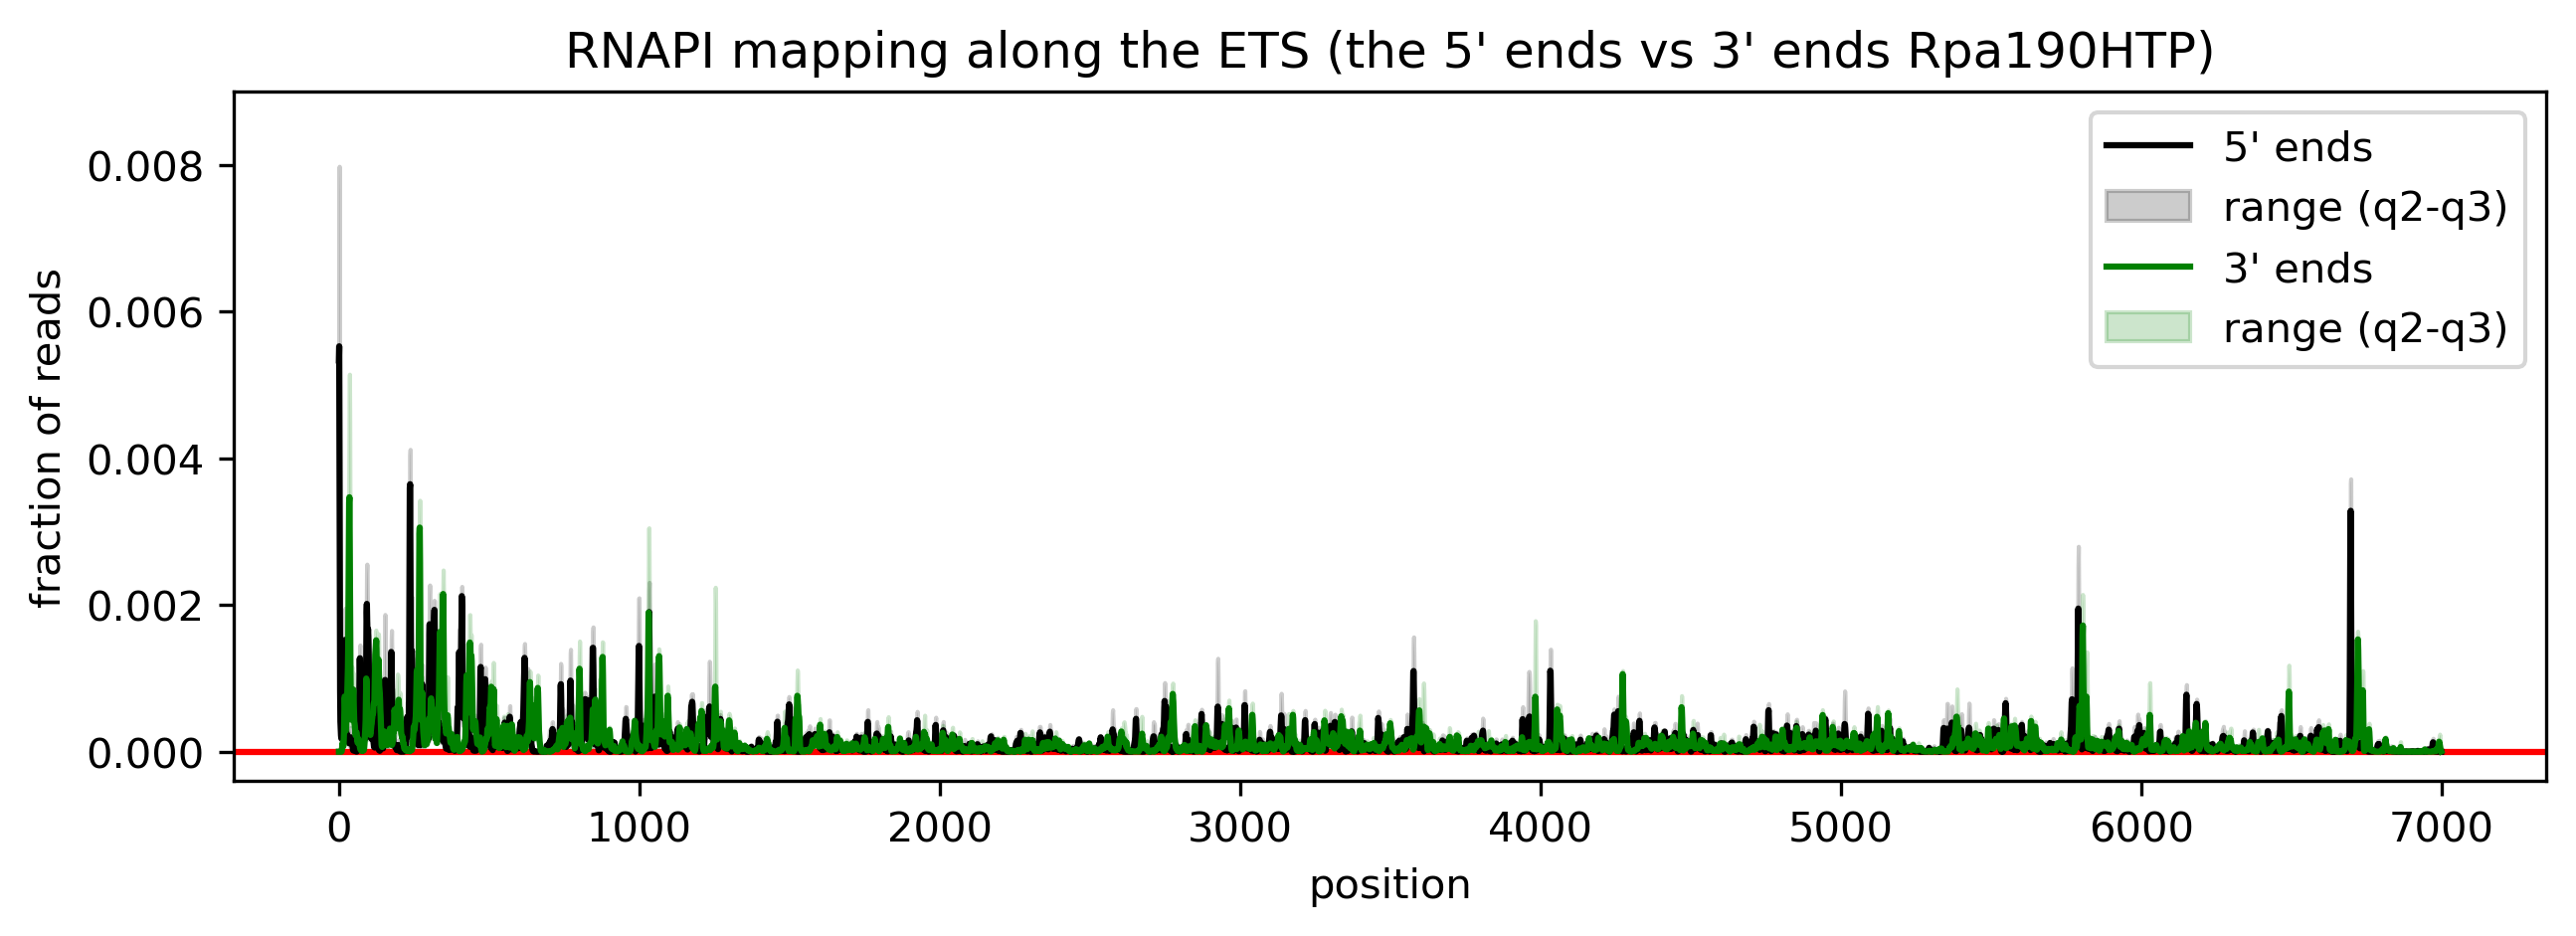

In [8]:
tt.plotting.plot_to_compare(ref=df11_Rpa190_3end, df=df12_Rpa190_5end,figsize=(10,3),ref_label="3' ends",label="5' ends",
                           title="RNAPI mapping along the ETS (the 5' ends vs 3' ends Rpa190HTP)",
                           dpi=300,offset=300, ylim=(None,0.009),
                           start=300,stop=7300,
                           fname='Fig_S2A.png')

## distribution of counts

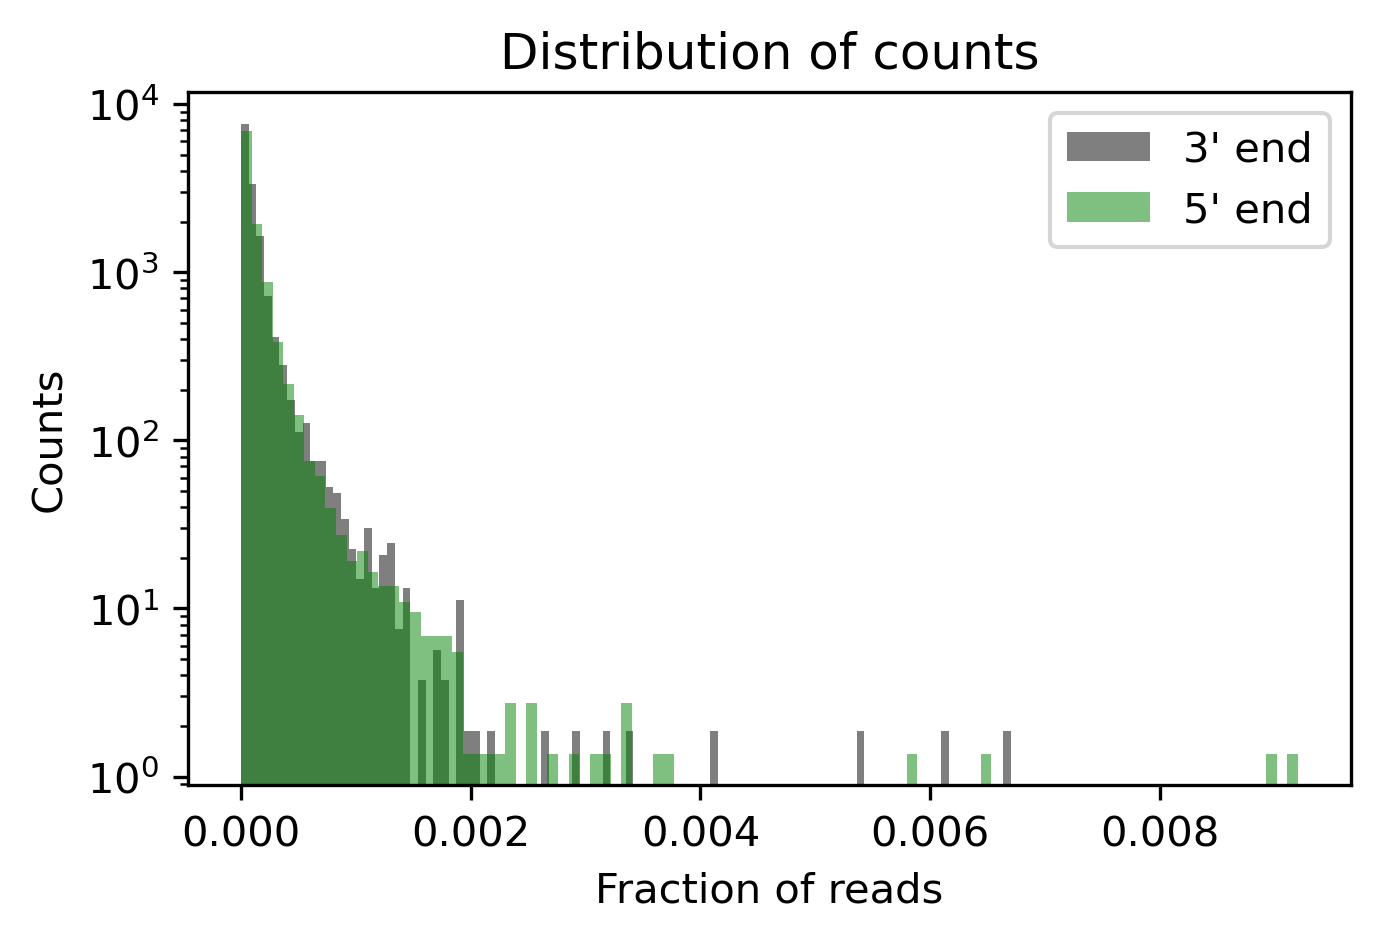

In [9]:
plt.figure(figsize=(5,3),dpi=300)
b=100
n3, bins3, patches = plt.hist(df11_Rpa190_3end['mean'], b, density=True, facecolor='black', alpha=0.5, label="3' end")
n5, bins5, patches = plt.hist(df12_Rpa190_5end['mean'], b, density=True, facecolor='g', alpha=0.5,label="5' end")

plt.xlabel('Fraction of reads')
plt.ylabel('Counts')
plt.title('Distribution of counts')
# plt.xlim(0, 0.004)
# plt.ylim(0, 0.03)
plt.yscale('log')
# plt.grid(True)
plt.legend()
plt.savefig("Fig_S2B.png",dpi=300,bbox_inches='tight')

Experiments: 
['LP230802_Rpa135HTP_wt_none_1b_PROFILE_3end', 'C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end', 'LP230802_Rpa135HTP_wt_none_1a_PROFILE_3end', 'LP230405_Rpa135HTP_wt_none_1_PROFILE_3end', 'EP240614_Rpa135HTP_wt_none_1_PROFILE_3end', 'seq3-EP240614_Rpa135HTP_wt_none_1_PROFILE_3end', 'C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'LP221214_Rpa135HTP_wt_none_2_PROFILE_3end']


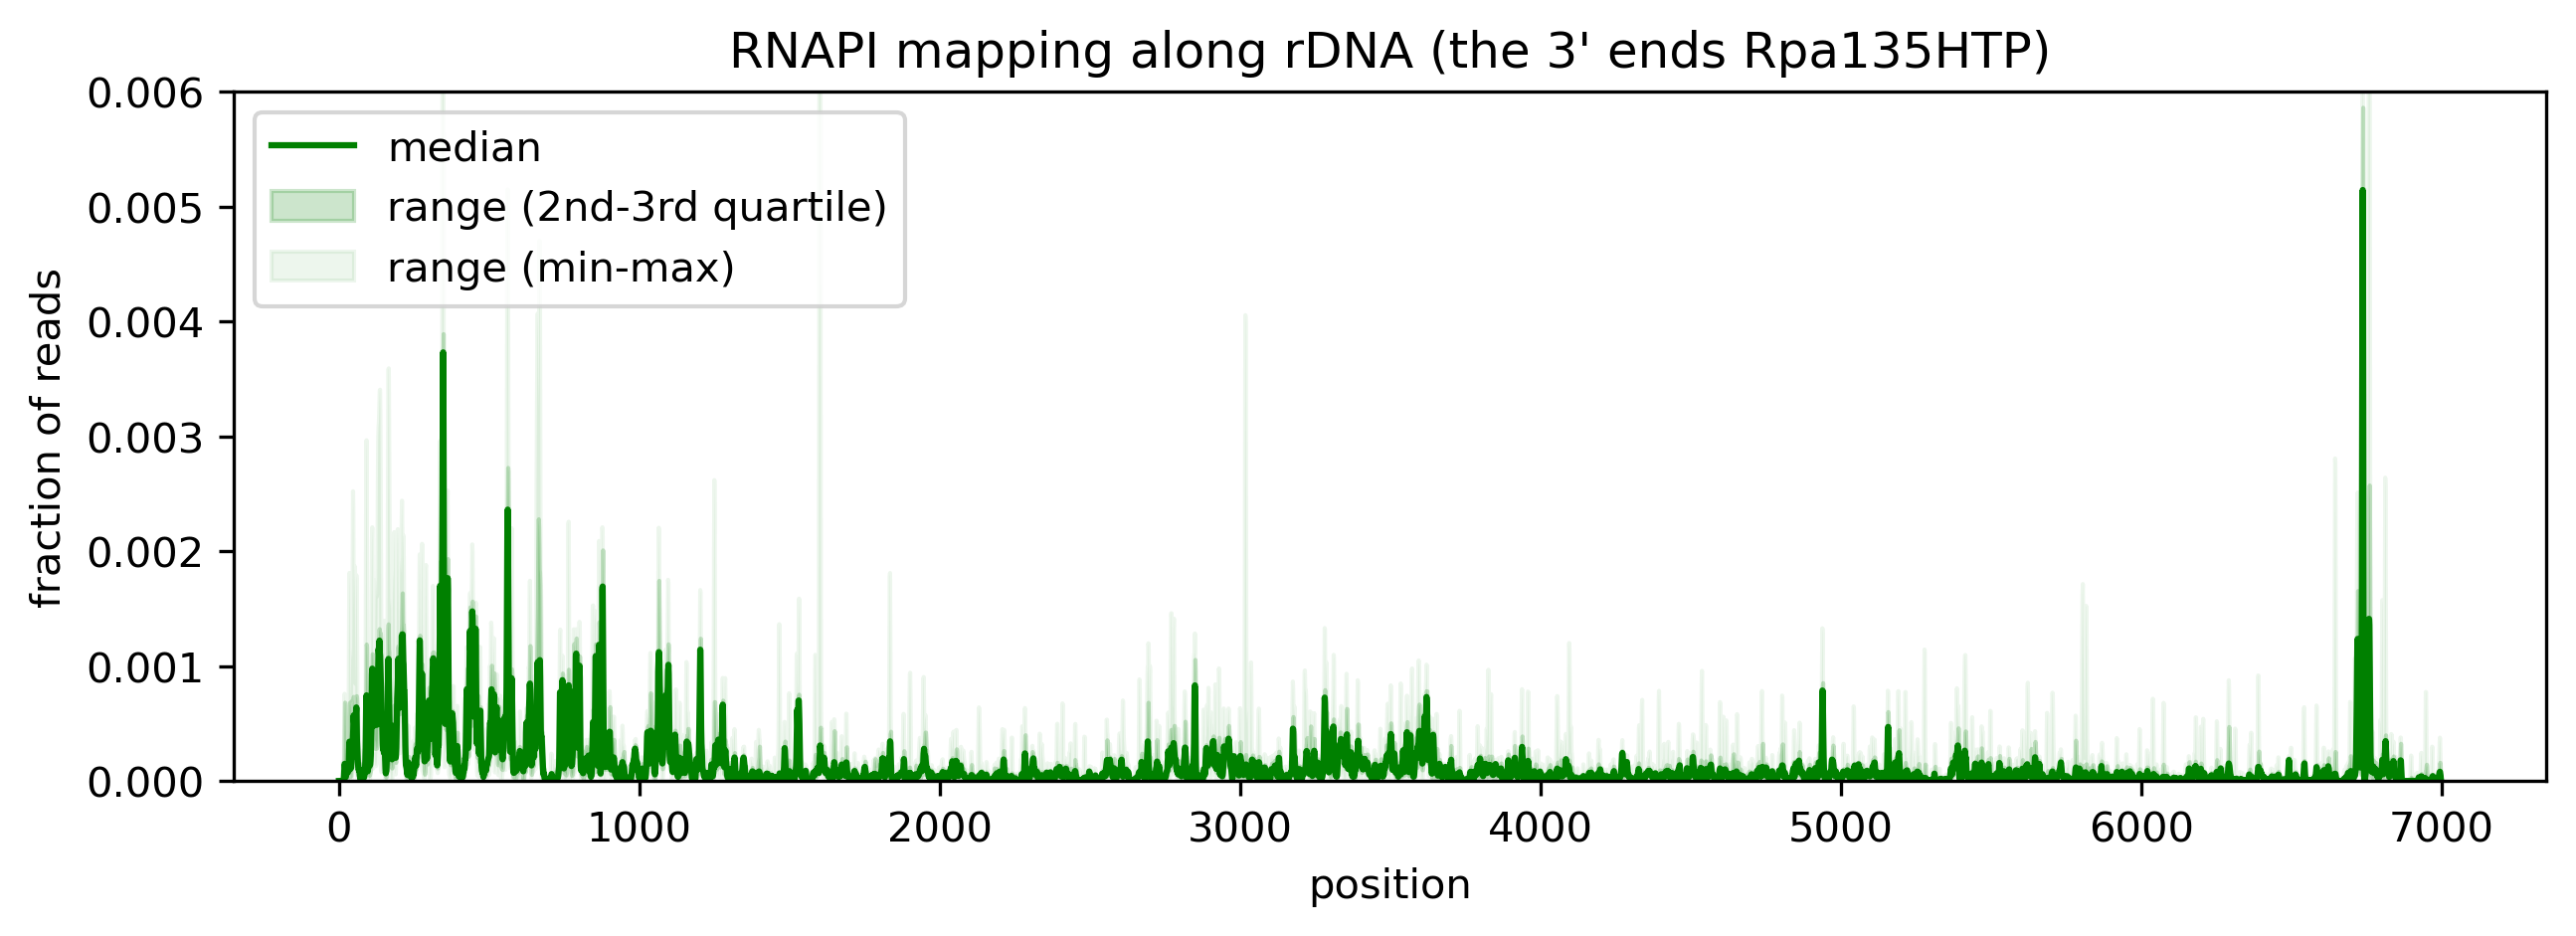

In [10]:
df14_Rpa135_3end = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa135HTP','wt','none'], 
                                     let_out=['hmo1','0s','25rDNA','UVA','noUV',
                                              'Rnt1','rrp44','trf4','air1','rat1',
                                              'h_','C_'],
                                     stats=True)

tt.plotting.plot_as_box_plot(df14_Rpa135_3end, figsize=(10,3), title="RNAPI mapping along rDNA (the 3' ends Rpa135HTP)",
                             start=300,stop=7300,
                             dpi=300,ylim=(None,0.006),offset=300,fname='Fig_S2C.png')

# Rpa190-HTP CRAC in Rnt1-AID validates the torsional entrainment model

Experiments: 
['EP240911_Rpa190HTP_Rnt1-AID_0h_3_PROFILE_3end', 'EP240313_Rpa190HTP_Rnt1-AID_0h_1_PROFILE_3end', 'EP240918_Rpa190HTP_Rnt1-AID_0h_4_PROFILE_3end']
Experiments: 
['EP240313_Rpa190HTP_Rnt1-AID_4h_1_PROFILE_3end', 'EP240911_Rpa190HTP_Rnt1-AID_4h_3_PROFILE_3end', 'EP240918_Rpa190HTP_Rnt1-AID_4h_4_PROFILE_3end']


/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

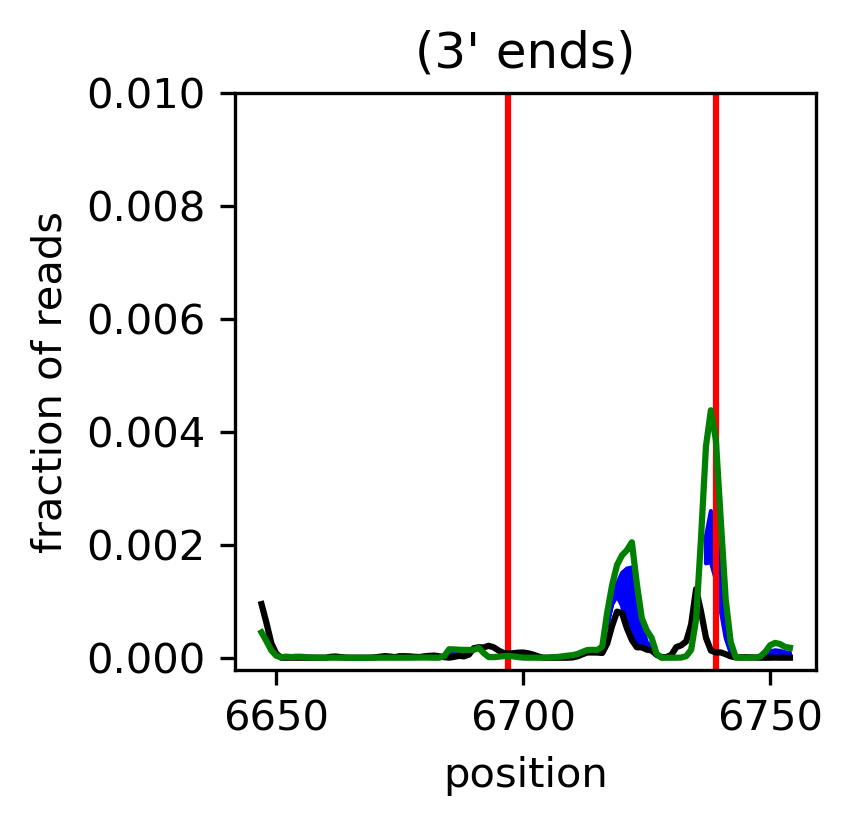

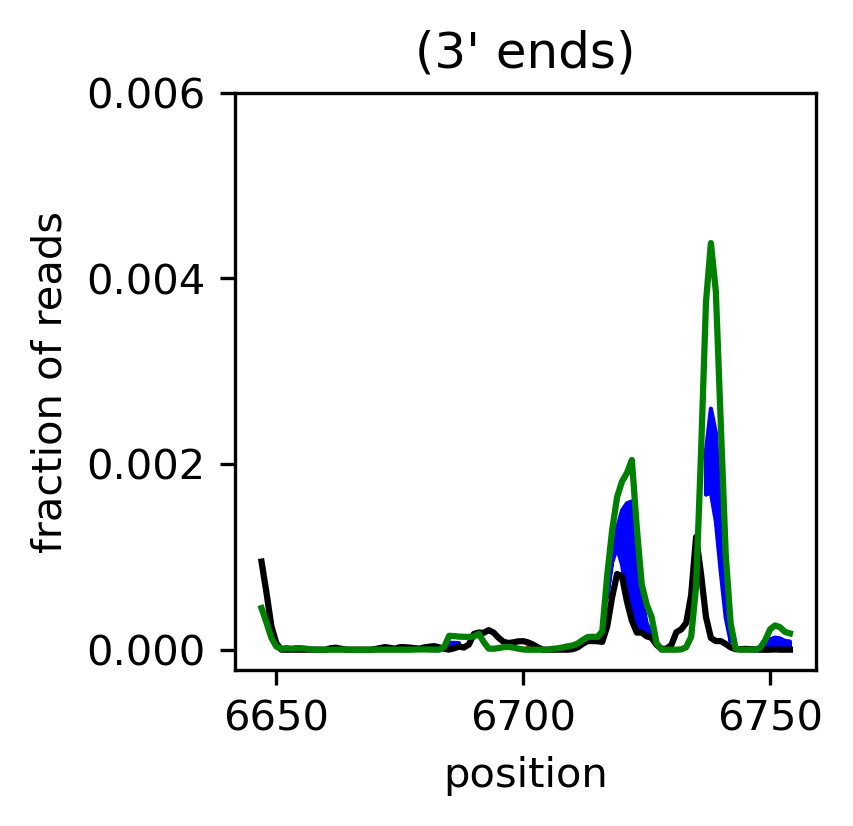

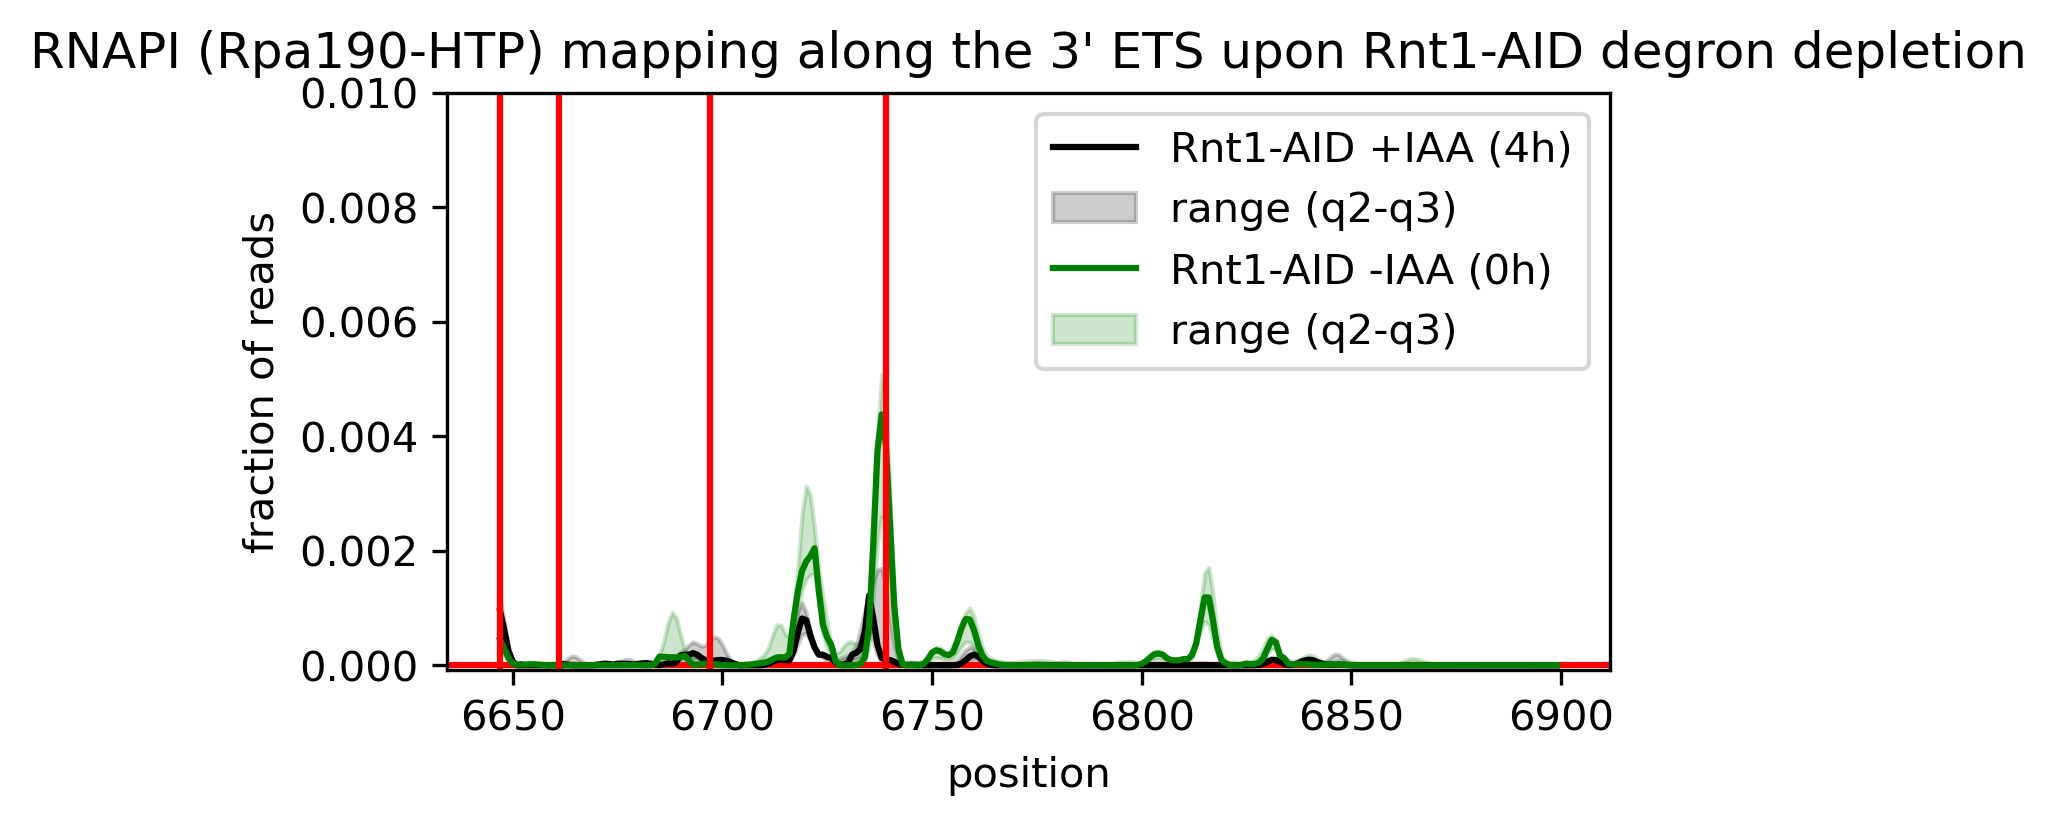

In [15]:
# 3' end
df21_Rpa190_3end_Rnt1AID_0h = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa190HTP','Rnt1-AID_0h'],
                                     let_out=['EP240606','seq9'],stats=True)

df22_Rpa190_3end_Rnt1AID_4h = tt.profiles.preprocess(df01_RDN37_3end,
                                     let_in=['Rpa190HTP','Rnt1-AID_4h'], 
                                     let_out=['EP240606','seq9'],stats=True)

tt.plotting.plot_diff(ref=df21_Rpa190_3end_Rnt1AID_0h, dataset=df22_Rpa190_3end_Rnt1AID_4h,figsize=(2.5,2.5),label1="wt (-IAA)",label2="Rnt1 degron (+IAA)",
                           title="(3' ends)",plot_ranges=False,
                           dpi=300,offset=300, ylim=(None,0.01), ranges='qq',legend=False,
                           start=6647+300, stop=6755+300,
                           h_lines=[6697,6739],
                           fname='Fig_2E.png')

tt.plotting.plot_diff(ref=df21_Rpa190_3end_Rnt1AID_0h, dataset=df22_Rpa190_3end_Rnt1AID_4h,figsize=(2.5,2.5),label1="wt (-IAA)",label2="Rnt1 degron (+IAA)",
                           title="(3' ends)",plot_ranges=False,
                           dpi=300,offset=300, ylim=(None,0.006), ranges='qq',legend=False,
                           start=6647+300, stop=6755+300,
                           fname='Fig_2E_noLines.png')

tt.plotting.plot_to_compare(ref=df21_Rpa190_3end_Rnt1AID_0h, df=df22_Rpa190_3end_Rnt1AID_4h,figsize=(5,2.5),ref_label="Rnt1-AID -IAA (0h)",label="Rnt1-AID +IAA (4h)",
                           title="RNAPI (Rpa190-HTP) mapping along the 3' ETS upon Rnt1-AID degron depletion",
                           dpi=300,offset=300, ylim=(None,0.01),
                           start=6647+300, stop=6900+300,
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           fname='Fig_2Ev2.png')

Experiments: 
['EP240918_Rpa190HTP_Rnt1-AID_0h_4_PROFILE_5end', 'EP240313_Rpa190HTP_Rnt1-AID_0h_1_PROFILE_5end', 'EP240911_Rpa190HTP_Rnt1-AID_0h_3_PROFILE_5end']
Experiments: 
['EP240911_Rpa190HTP_Rnt1-AID_4h_3_PROFILE_5end', 'EP240918_Rpa190HTP_Rnt1-AID_4h_4_PROFILE_5end', 'EP240313_Rpa190HTP_Rnt1-AID_4h_1_PROFILE_5end']


/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

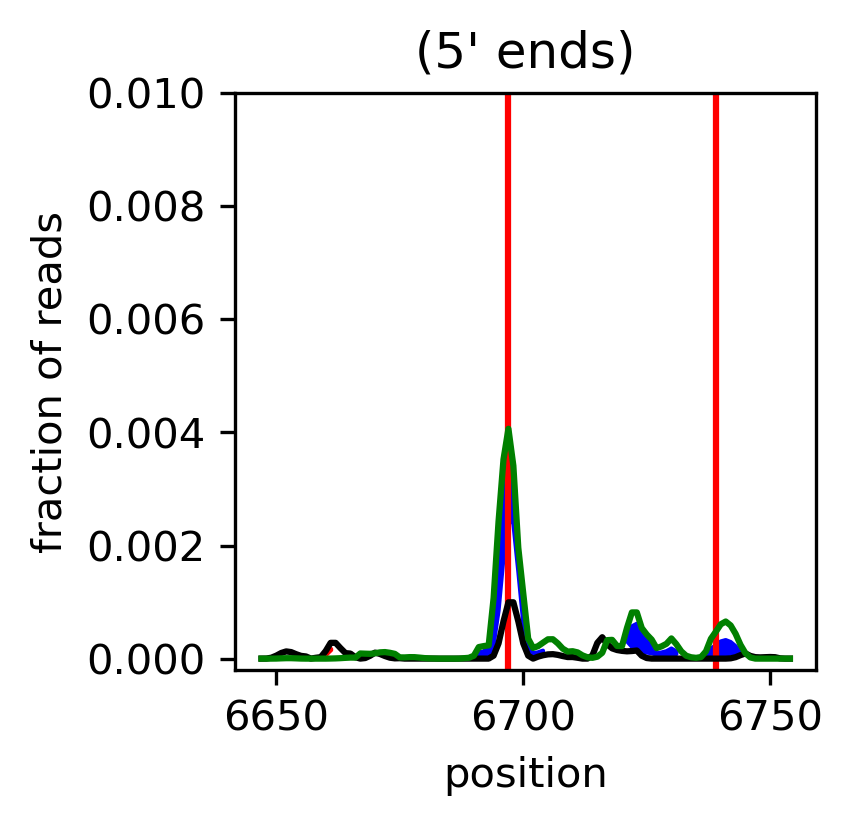

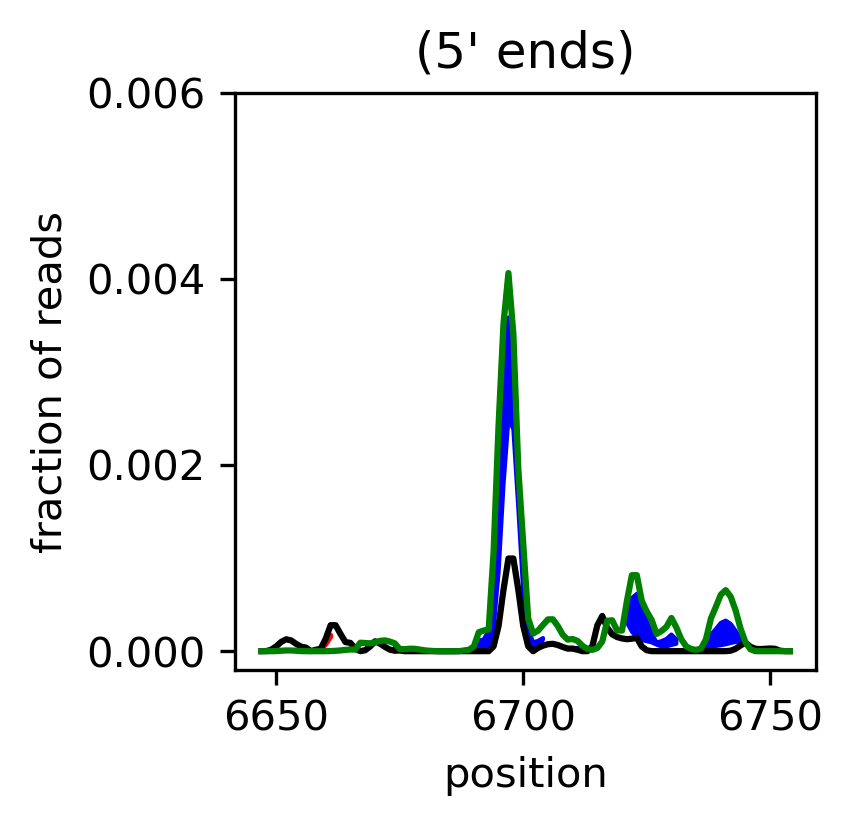

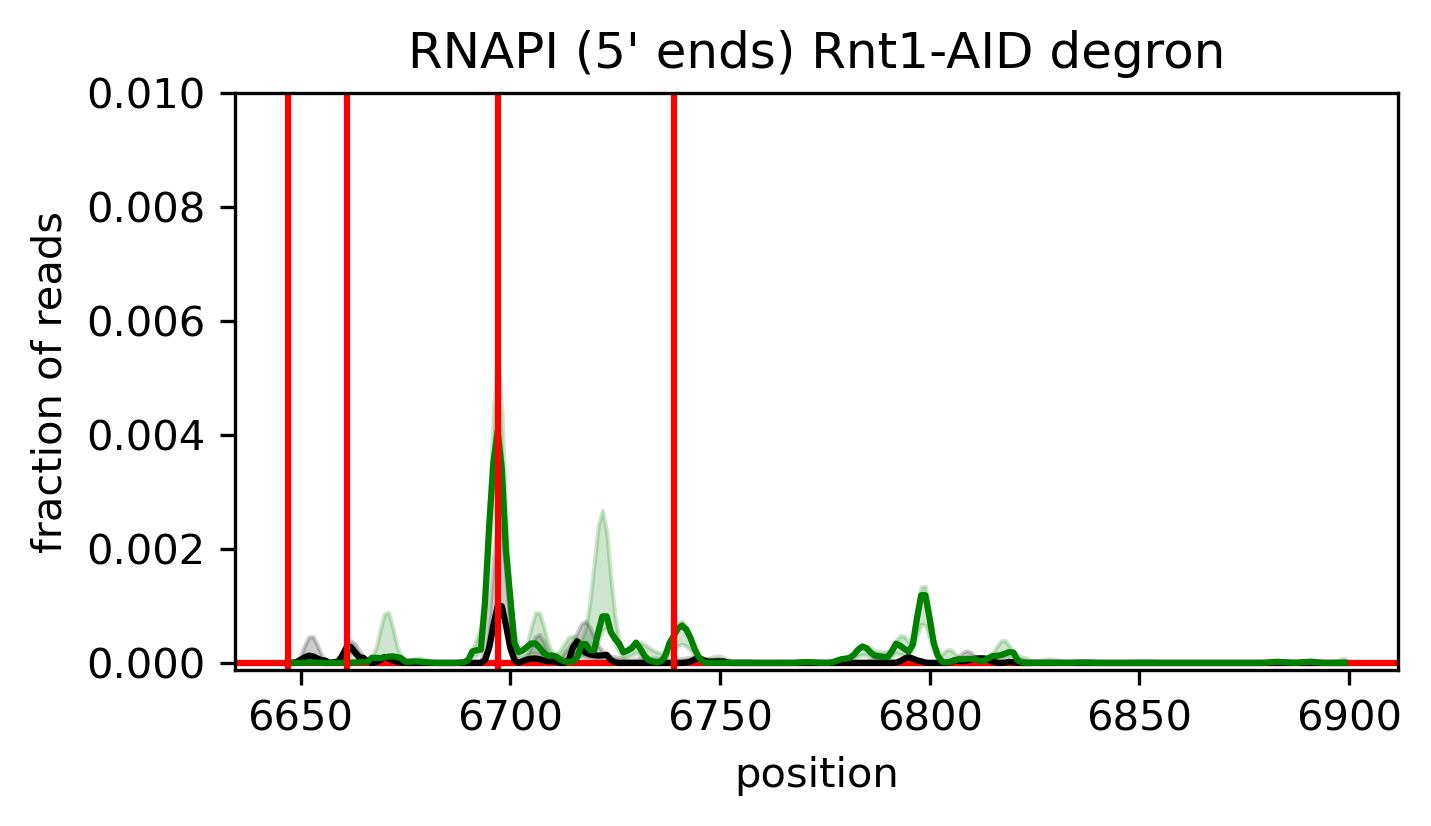

In [14]:
# 5' end
df23_Rpa190_5end_Rnt1AID_0h = tt.profiles.preprocess(df02_RDN37_5end,
                                     let_in=['Rpa190HTP','Rnt1-AID_0h'],
                                     let_out=['EP240606','seq9'],stats=True)

df24_Rpa190_5end_Rnt1AID_4h = tt.profiles.preprocess(df02_RDN37_5end,
                                     let_in=['Rpa190HTP','Rnt1-AID_4h'], 
                                     let_out=['EP240606','seq9'],stats=True)

tt.plotting.plot_diff(ref=df23_Rpa190_5end_Rnt1AID_0h, dataset=df24_Rpa190_5end_Rnt1AID_4h,figsize=(2.5,2.5),label1="Rnt1-AID -IAA (0h)",label2="Rnt1-AID +IAA (4h)",
                           title="(5' ends)",
                           dpi=300,offset=300, ylim=(None,0.01), legend=False,
                           start=6647+300, stop=6755+300,ranges="qq",plot_ranges=False,
                           h_lines=[6697,6739],
                           fname='Fig_2F.png')

tt.plotting.plot_diff(ref=df23_Rpa190_5end_Rnt1AID_0h, dataset=df24_Rpa190_5end_Rnt1AID_4h,figsize=(2.5,2.5),label1="Rnt1-AID -IAA (0h)",label2="Rnt1-AID +IAA (4h)",
                           title="(5' ends)",
                           dpi=300,offset=300, ylim=(None,0.006), legend=False,
                           start=6647+300, stop=6755+300,ranges="qq",plot_ranges=False,
                           fname='Fig_2F_noLines.png')

tt.plotting.plot_to_compare(ref=df23_Rpa190_5end_Rnt1AID_0h, df=df24_Rpa190_5end_Rnt1AID_4h,figsize=(5,2.5),ref_label="Rnt1-AID -IAA (0h)",label="Rnt1-AID +IAA (4h)",
                           title="RNAPI (5' ends) Rnt1-AID degron",
                           dpi=300,offset=300, ylim=(None,0.01), legend=False,
                           start=6647+300, stop=6900+300,
                           h_lines=[i-300 for i in cleavage_sites.values()],
                           fname='Fig_2Fv2.png')

In [13]:
# def clusterDatasets(df, name="expID_bait_background_condition_replicate"):
#     out_df = df.columns.to_series().str.split("_",expand=True)
#     out_df.columns = [i for i in name.split("_")] #parse names
#     out_df['dataset'] = out_df['bait']+"_"+out_df['background']+"_"+out_df['condition']
#     out_df['bait_background'] = out_df['bait']+"_"+out_df['background']
#     return out_df

# rule_meta = {'RNAPI' : (["Rpa135HTP","Rpa190HTP"],["Rpa12dC"]),
#         'Rpa12dC' : (['FPHRpa12'],["Rpa135HTP","Rpa190HTP","Rpa12dC"]),
#         'RNAPI-Rpa12dC' : (["Rpa135HTP","Rpa190HTP","Rpa12dC"],['wt']),
#         'RNAPII' : (["Rpo21HTP"],[]),
#         'RNAPIII' : (["Rpc160HTP"],[]),
#         'Rat1' : (["Rat1HTP"],[]),
#         'surveillance' : (["Csl4HTP","Mtr4HTP","Rrp41HTP","Rrp44-exo-S1-HTP","Rrp44-exoHTP","Rrp44HTP","Rrp6HTP"],[]),
#         "Nab2" : (["Nab2HTP"],[])
#        }

# rule = {'Rpa190HTP_wt' : (["Rpa190HTP"],["Rpa12dC",]),
#                'Rpa135HTP_wt' : (["Rpa135HTP"],["Rpa12dC"]),
#         'Rpa12dC' : (['FPHRpa12'],["Rpa135HTP","Rpa190HTP","Rpa12dC"]),
#         'RNAPI-Rpa12dC' : (["Rpa135HTP","Rpa190HTP","Rpa12dC"],['wt']),
#         'RNAPII' : (["Rpo21HTP"],[]),
#         'RNAPIII' : (["Rpc160HTP"],[]),
#         'Rat1' : (["Rat1HTP"],[]),
#         'surveillance' : (["Csl4HTP","Mtr4HTP","Rrp41HTP","Rrp44-exo-S1-HTP","Rrp44-exoHTP","Rrp44HTP","Rrp6HTP"],[]),
#         "Nab2" : (["Nab2HTP"],[])
#        }

# def metaDatasets(name,rule={}):
#     out = []
#     for k in rule.keys():
#         let_in = rule[k][0]
#         if rule[k][1]: let_out = rule[k][1]
#         else: let_out = ['Wont find this string']
                    
#         if any(i for i in let_in if i in name) and any(i for i in let_out if i not in name):
#             out.append(k)
#     if len(out)==1:
#         return out[0]
#     else:
#         return 'unassigned'